<a href="https://colab.research.google.com/github/Kamalparanth/ML-concepts/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt

In [6]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

train_images,test_images = train_images/255.0, test_images/255.0


170508288/170498071 [==============================] - 3s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics = ['accuracy']
)

In [11]:
history = model.fit(train_images,train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5415 - accuracy: 0.4346 - val_loss: 1.2553 - val_accuracy: 0.5509
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1641 - accuracy: 0.5866 - val_loss: 1.1006 - val_accuracy: 0.6107
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0124 - accuracy: 0.6467 - val_loss: 0.9737 - val_accuracy: 0.6626
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9081 - accuracy: 0.6820 - val_loss: 1.0657 - val_accuracy: 0.6310
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8377 - accuracy: 0.7067 - val_loss: 0.9029 - val_accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7697 - accuracy: 0.7303 - val_loss: 0.8900 - val_accuracy: 0.6956
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7210 - accuracy: 0.7479 - val_loss: 0.8613 -

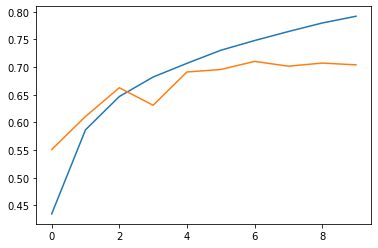

In [13]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')

In [14]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - loss: 0.9079 - accuracy: 0.7040 - 4s/epoch - 12ms/step
